In [1444]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1445]:
INITIAL_DOSEN = 3

In [1446]:
class Universitas:
    total_mahasiswa = 0
    anggaran = 10000000000

    def __init__(self, nama_kampus, prodi):
        self.nama = nama_kampus
        self.prodi = prodi

    def hitung_dosen_kampus(self):
        total = 0
        for program_studi in self.prodi:
            total += program_studi.dosen
        return total
    
    def mahasiswa_lulus(self):
        for program_studi in self.prodi:
            program_studi.angkatan.pop(0)

In [1447]:
class Prodi:
    def __init__(self, nama, ukt, kode):
        self.nama = nama
        self.kode = kode
        self.ukt = ukt
        self.angkatan = []
        self.dosen = 0

    def tambah_angkatan_prodi(self, angkatan):
        self.angkatan.append(angkatan)

    def hitung_mahasiswa_prodi(self):
        total = 0
        for tiap_angkatan in self.angkatan:
            total += tiap_angkatan.hitung_mahasiswa_angkatan()
        return total

In [1448]:
class Angkatan:
    def __init__(self, tahun):
        self.tahun = tahun
        self.mahasiswa = []
        self.kelas = []

    def tambah_mahasiswa_angkatan(self, mahasiswa):
        self.mahasiswa.append(mahasiswa)

    def hitung_mahasiswa_angkatan(self):
        return len(self.mahasiswa)

In [1449]:
class Mahasiswa:
    def __init__(self,NIM):
        self.NIM = NIM

In [1450]:
class Kelas:
    def __init__(self,nama_kelas):
        self.nama_kelas = nama_kelas
        self.mahasiswa = []
    def tambah_mahasiswa_kelas(self,mahasiswa):
        self.mahasiswa.append(mahasiswa)
    def hitung_mahasiswa_kelas(self):
        return len(self.mahasiswa)

In [1451]:
prodi = [Prodi("Informatika",7000000,"IF"),
         Prodi("Sistem Informasi",8000000,"SI"),
         Prodi("Teknologi Indormasi",8000000,"TI"),
         Prodi("Rekayasa Perangkat Lunak",8500000,"RPL"),
         Prodi("Sains Data",7000000,"DS")]

In [1452]:
TelkomMadura = Universitas("Telkom Madura",prodi)

In [1453]:
def proses_mendaftar(NIM,tahun_angkatan):
    # MEMILIH PRODI
    prodi_terpilih = random.randint(0,4)
    mahasiswa_baru = Mahasiswa(NIM)
    prodi[prodi_terpilih].angkatan[tahun_angkatan].mahasiswa.append(mahasiswa_baru)
    
    # PEMBAYARAN
    BiayaUP3 = 8000000
    BiayaSDP = 12150000
    BiayaUKT = prodi[prodi_terpilih].ukt
    Total = BiayaSDP + BiayaUKT + BiayaUP3
    return Total

In [1454]:
def hitung_kebutuhan_dosen(program_studi):
    total_mahasiswa = program_studi.hitung_mahasiswa_prodi()
    kebutuhan_dosen = total_mahasiswa // 60
    program_studi.dosen = kebutuhan_dosen + INITIAL_DOSEN

In [1455]:
def membuat_kelas(tahun_angkatan,tahun):
    for program_studi in prodi:
        total_mahasiswa = program_studi.angkatan[tahun_angkatan].hitung_mahasiswa_angkatan()
        total_kelas = total_mahasiswa // 30 + 1
        kode_kelas = 0

        total_kelas_counter = 0
        start = 0
        while total_kelas_counter < total_kelas and total_mahasiswa >= 0:
            program_studi.angkatan[tahun_angkatan].kelas.append(Kelas(f"{program_studi.kode}-{tahun}-{kode_kelas + 1}")) # menambahkan kelas baru
            for mahasiswa in program_studi.angkatan[tahun_angkatan].mahasiswa[start:]: # looping ke mahasiswa di angkatan tertentu
                program_studi.angkatan[tahun_angkatan].kelas[kode_kelas].mahasiswa.append(mahasiswa) # menambahkan mahasiswa ke kelas
                total_mahasiswa = total_mahasiswa - 1
                start += 1
                if program_studi.angkatan[tahun_angkatan].kelas[kode_kelas].hitung_mahasiswa_kelas() == 30: # jika mahasiswa per kelas sudah 30 maka break dan buat kelas baru
                    break
            kode_kelas += 1
            total_kelas_counter += 1

        # for _ in range(total_kelas):
        #     program_studi.angkatan[tahun_angkatan].kelas.append(Kelas(f"{program_studi.kode}-{tahun_angkatan}-{kode_kelas + 1}")) # menambahkan kelas baru
        #     for mahasiswa in program_studi.angkatan[tahun_angkatan].mahasiswa: # looping ke mahasiswa di angkatan tertentu
        #         program_studi.angkatan[tahun_angkatan].kelas[kode_kelas].mahasiswa.append(mahasiswa) # menambahkan mahasiswa ke kelas
        #         total_mahasiswa = total_mahasiswa - 1
        #         if program_studi.angkatan[tahun_angkatan].kelas[kode_kelas].hitung_mahasiswa_kelas() == 30: # jika mahasiswa per kelas sudah 30 maka break dan buat kelas baru
        #             break
        #     kode_kelas += 1
            
        # if total_mahasiswa - total_kelas * 30 != 0:
        #     sisa_mahasiswa = total_mahasiswa - total_mahasiswa * 30 
        #     for sisa in range(total_mahasiswa-sisa_mahasiswa,total_mahasiswa): # looping dari mahasiswa yang belum dapat kelas
        #         program_studi.angkatan[tahun_angkatan].kelas.append(Kelas(f"{program_studi.kode}-{tahun_angkatan}-{kode_kelas + 1}")) # menambahkan kelas baru
        #         program_studi.angkatan[tahun_angkatan].kelas[kode_kelas].mahasiswa.append(program_studi.angkatan[tahun_angkatan].mahasiswa[sisa]) # menambahkan mahasiswa sisa ke kelas baru
        #         if program_studi.angkatan[tahun_angkatan].kelas[kode_kelas].hitung_mahasiswa_kelas() == 30: # jika mahasiswa per kelas sudah 30 maka break dan buat kelas baru
        #             break
        #     kode_kelas += 1
        # KEBUTUHAN DOSEN
        hitung_kebutuhan_dosen(program_studi)

In [1456]:
def bayar_ukt():
    pemasukan = 0
    for program_studi in prodi:
        pemasukan += program_studi.ukt * program_studi.hitung_mahasiswa_prodi()
    return pemasukan

In [1457]:
def pengeluaran_kampus(bulan):
    gaji_dosen = 7000000 * TelkomMadura.hitung_dosen_kampus()
    pengeluaran = np.random.uniform(0.7, 0.9) * (bayar_ukt() - gaji_dosen) + gaji_dosen
    if bulan == 12:
        pengeluaran += 200000000 # biaya gedung
    return pengeluaran

In [1458]:
def hitung_mahasiswa(tahun_angkatan):
    total = 0
    for program_studi in prodi:
        total += program_studi.angkatan[tahun_angkatan].hitung_mahasiswa_angkatan()
    return total

In [1459]:
def lihat_kelas():
    # for program_studi in prodi:
    #     for angkatan in program_studi.angkatan:
    #         print(f"{program_studi.nama} ({angkatan.tahun}) :")
    #         for kelas in angkatan.kelas:
    #             print(f"{kelas.nama_kelas} : {[mahasiswa.NIM for mahasiswa in kelas.mahasiswa]}")
    #     print("\n")
    for angkatan in prodi[0].angkatan:
        print(f"{angkatan.tahun} = {[kelas.nama_kelas for kelas in angkatan.kelas]}")

In [1460]:
def rekap_mahasiswa_prodi(tahun):
    mahasiswa = []
    for program_studi in prodi:
        mahasiswa.append(program_studi.angkatan[tahun].hitung_mahasiswa_angkatan())
    return mahasiswa

In [1461]:
def lihat_angkatan():
    print([i.tahun for i in prodi[0].angkatan])

In [1462]:
def simulasi_kampus(tahun_start,tahun_terakhir):
    angkatan = tahun_start
    growth_factor = 1.2 # kenaikan atau penurunan mahasiswa calon pendaftar
    mahasiswa = random.randint(1,100) # kemungkinan mahasiswa calon pendaftar
    nim = 1 # NIM atau ID mahasiswa
    cashflow = []
    data_mahasiswa = []
    pendaftar = 0
    # SIMULASI
    for tahun in range(tahun_terakhir - tahun_start): 
        # Membuat Angkatan Baru di Tiap Prodi
        pendaftar = 0
        for program_studi in prodi:
            program_studi.tambah_angkatan_prodi(Angkatan(tahun))
        for bulan in range(1,13):
            pemasukan = 0
            if(bulan == 2 or bulan == 9):
                pemasukan += bayar_ukt()
            # PENDAFTARAN   
            for _ in range(30): 
                if random.random() < 0.5: # Kemungkinan kenaikan calon pendaftar
                    mahasiswa +=  int(mahasiswa * random.uniform(0.05, 0.5) * growth_factor)
                else:
                    mahasiswa -= int(mahasiswa * random.uniform(0.05, 0.5))
                # Mahasiswa Mendaftar
                for _ in range(mahasiswa):
                    if hitung_mahasiswa(-1) == 1000:
                        break
            
                    if random.random() < 0.5:
                        pemasukan += proses_mendaftar(nim,-1)
                        nim += 1
                        pendaftar += 1
                    
            # PEMASUKAN TIAP BULAN
            TelkomMadura.anggaran += pemasukan
        
            # PENGELUARAN TIAP BULAN
            pengeluaran = pengeluaran_kampus(bulan)
            TelkomMadura.anggaran -= pengeluaran
            cashflow.append([angkatan,bulan,pemasukan,pengeluaran,TelkomMadura.anggaran])
            
        if tahun > 3:
            TelkomMadura.mahasiswa_lulus()
        
        # PEMBAGIAN KELAS
        membuat_kelas(-1,tahun)
        data_mahasiswa.append(rekap_mahasiswa_prodi(-1))
        # lihat_angkatan()
        lihat_kelas()
        print("\n")
        
        angkatan += 1
            
    return [cashflow,data_mahasiswa]

In [1463]:
result = simulasi_kampus(2021,2050)
result

0 = ['IF-0-1', 'IF-0-2', 'IF-0-3', 'IF-0-4', 'IF-0-5', 'IF-0-6']


0 = ['IF-0-1', 'IF-0-2', 'IF-0-3', 'IF-0-4', 'IF-0-5', 'IF-0-6']
1 = ['IF-1-1', 'IF-1-2', 'IF-1-3', 'IF-1-4', 'IF-1-5', 'IF-1-6']


0 = ['IF-0-1', 'IF-0-2', 'IF-0-3', 'IF-0-4', 'IF-0-5', 'IF-0-6']
1 = ['IF-1-1', 'IF-1-2', 'IF-1-3', 'IF-1-4', 'IF-1-5', 'IF-1-6']
2 = ['IF-2-1', 'IF-2-2', 'IF-2-3', 'IF-2-4', 'IF-2-5', 'IF-2-6', 'IF-2-7', 'IF-2-8']


0 = ['IF-0-1', 'IF-0-2', 'IF-0-3', 'IF-0-4', 'IF-0-5', 'IF-0-6']
1 = ['IF-1-1', 'IF-1-2', 'IF-1-3', 'IF-1-4', 'IF-1-5', 'IF-1-6']
2 = ['IF-2-1', 'IF-2-2', 'IF-2-3', 'IF-2-4', 'IF-2-5', 'IF-2-6', 'IF-2-7', 'IF-2-8']
3 = ['IF-3-1', 'IF-3-2', 'IF-3-3', 'IF-3-4', 'IF-3-5', 'IF-3-6', 'IF-3-7']


1 = ['IF-1-1', 'IF-1-2', 'IF-1-3', 'IF-1-4', 'IF-1-5', 'IF-1-6']
2 = ['IF-2-1', 'IF-2-2', 'IF-2-3', 'IF-2-4', 'IF-2-5', 'IF-2-6', 'IF-2-7', 'IF-2-8']
3 = ['IF-3-1', 'IF-3-2', 'IF-3-3', 'IF-3-4', 'IF-3-5', 'IF-3-6', 'IF-3-7']
4 = ['IF-4-1', 'IF-4-2', 'IF-4-3', 'IF-4-4', 'IF-4-5', 'IF-4-6', 'I

[[[2021, 1, 5728900000, 1338097826.6537251, 14390802173.346275],
  [2021, 2, 3393250000, 1504968710.5296211, 16279083462.816654],
  [2021, 3, 1140650000, 1720287967.6435335, 15699445495.17312],
  [2021, 4, 1529750000, 2201185231.505716, 15028010263.667402],
  [2021, 5, 951100000, 2636234688.984963, 13342875574.68244],
  [2021, 6, 1635850000, 2508364830.4521112, 12470360744.230328],
  [2021, 7, 2925250000, 3724259043.784637, 11671351700.44569],
  [2021, 8, 692750000, 3295024530.250889, 9069077170.194801],
  [2021, 9, 5784250000, 3851933808.2746286, 11001393361.920174],
  [2021, 10, 1525250000, 3747529868.245566, 8779113493.674608],
  [2021, 11, 1331200000, 4809825503.721125, 5300487989.953484],
  [2021, 12, 1108500000, 4797050720.552786, 1611937269.4006977],
  [2022, 1, 1448800000, 5102335528.902231, -2041598259.5015335],
  [2022, 2, 8596500000, 6045138451.22502, 509763289.2734461],
  [2022, 3, 645450000, 5748281850.605481, -4593068561.332035],
  [2022, 4, 1507600000, 6712477291.930068,

In [1464]:
columns = ['tahun', 'bulan', 'pemasukan', 'pengeluaran', 'anggaran']
df = pd.DataFrame(result[0], columns=columns)
dfeachYear = []

tahuncolumns = df.tahun.unique().tolist()

for i in tahuncolumns:
    dfeachYear.append(df.loc[df.tahun == i])

In [1465]:
dfeachYear

[    tahun  bulan   pemasukan   pengeluaran      anggaran
 0    2021      1  5728900000  1.338098e+09  1.439080e+10
 1    2021      2  3393250000  1.504969e+09  1.627908e+10
 2    2021      3  1140650000  1.720288e+09  1.569945e+10
 3    2021      4  1529750000  2.201185e+09  1.502801e+10
 4    2021      5   951100000  2.636235e+09  1.334288e+10
 5    2021      6  1635850000  2.508365e+09  1.247036e+10
 6    2021      7  2925250000  3.724259e+09  1.167135e+10
 7    2021      8   692750000  3.295025e+09  9.069077e+09
 8    2021      9  5784250000  3.851934e+09  1.100139e+10
 9    2021     10  1525250000  3.747530e+09  8.779113e+09
 10   2021     11  1331200000  4.809826e+09  5.300488e+09
 11   2021     12  1108500000  4.797051e+09  1.611937e+09,
     tahun  bulan    pemasukan   pengeluaran      anggaran
 12   2022      1   1448800000  5.102336e+09 -2.041598e+09
 13   2022      2   8596500000  6.045138e+09  5.097633e+08
 14   2022      3    645450000  5.748282e+09 -4.593069e+09
 15   202

In [1466]:
columns = ['Informatika', 'Sistem Informasi', 'Teknologi Informasi', 'Rekayasa Perangkat Lunak', 'Sains Data']
df = pd.DataFrame(result[1], columns=columns)
df

,Informatika,Sistem Informasi,Teknologi Informasi,Rekayasa Perangkat Lunak,Sains Data
0,164,145,163,138,168
1,176,205,199,223,197
2,228,196,192,179,205
3,181,161,189,160,157
4,192,189,236,194,189
5,114,138,119,116,131
6,144,129,138,132,114
7,194,219,186,210,191
8,185,189,206,223,197
9,206,201,203,214,176


In [1467]:
lihat_kelas()

25 = ['IF-25-1', 'IF-25-2', 'IF-25-3', 'IF-25-4', 'IF-25-5', 'IF-25-6', 'IF-25-7']
26 = ['IF-26-1', 'IF-26-2', 'IF-26-3', 'IF-26-4', 'IF-26-5', 'IF-26-6']
27 = ['IF-27-1', 'IF-27-2', 'IF-27-3', 'IF-27-4', 'IF-27-5']
28 = ['IF-28-1', 'IF-28-2', 'IF-28-3', 'IF-28-4', 'IF-28-5', 'IF-28-6', 'IF-28-7']


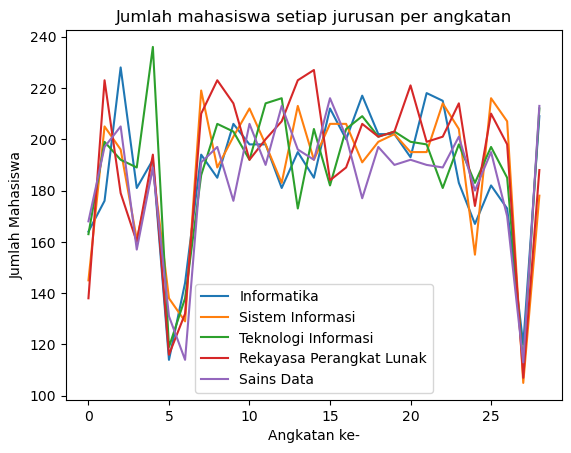

In [1468]:
df.plot(kind='line')  # You can also use 'bar', 'barh', 'scatter', etc. depending on the type of graph you want.
plt.xlabel('Angkatan ke-')
plt.ylabel('Jumlah Mahasiswa')
plt.title('Jumlah mahasiswa setiap jurusan per angkatan')
plt.show()

In [1469]:
dfeachYear
tahun_start = dfeachYear[0]['tahun'].iloc[0]
tahun_akhir = dfeachYear[-1]['tahun'].iloc[0]
print(tahun_start, tahun_akhir)

2021 2049


In [1470]:
dfeachYear[1]['anggaran'].mean()

-19550936534.797993

In [1471]:
print(dfeachYear[25].groupby('tahun')['anggaran'].mean())

tahun
2046   -5.611116e+12
Name: anggaran, dtype: float64


In [1472]:
pengeluaranTiapTahun = []
for year in range(len(dfeachYear)):
  pengeluaranTiapTahun.append(dfeachYear[year].groupby('tahun')['anggaran'].mean().to_list()[0])
pengeluaranTiapTahun

[11220328224.958807,
 -19550936534.797993,
 -105194559132.61186,
 -256219778700.24734,
 -448445361407.9937,
 -686458465931.6913,
 -903021745136.6195,
 -1100617400086.3528,
 -1319715061469.1611,
 -1545320116821.1272,
 -1767392381063.7556,
 -2005446913254.1482,
 -2252840046922.234,
 -2501412746868.4893,
 -2758807538920.935,
 -3018879019500.9907,
 -3293527156080.428,
 -3570012120012.4453,
 -3829378835974.6294,
 -4087643946004.2554,
 -4350769453241.8257,
 -4618259748495.785,
 -4873126931589.769,
 -5118273729604.011,
 -5373969353041.279,
 -5611115839330.784,
 -5848630352375.774,
 -6083776732901.263,
 -6293881963285.356]

In [1473]:
dfPengeluaranTiapTahun = pd.DataFrame(pengeluaranTiapTahun, columns=['anggaran'])
dfPengeluaranTiapTahun

,anggaran
0,1.122033e+10
1,-1.955094e+10
2,-1.051946e+11
3,-2.562198e+11
4,-4.484454e+11
5,-6.864585e+11
6,-9.030217e+11
7,-1.100617e+12
8,-1.319715e+12
9,-1.545320e+12


In [1474]:
tahun_angkatan = [i for i in range(tahun_start, tahun_akhir + 1)]
dfTahunAngkatan = pd.DataFrame(tahun_angkatan, columns=['tahun'])
dfTahunAngkatan

,tahun
0,2021
1,2022
2,2023
3,2024
4,2025
5,2026
6,2027
7,2028
8,2029
9,2030


In [1475]:
result = pd.concat([dfTahunAngkatan, dfPengeluaranTiapTahun], axis=1)
result

,tahun,anggaran
0,2021,1.122033e+10
1,2022,-1.955094e+10
2,2023,-1.051946e+11
3,2024,-2.562198e+11
4,2025,-4.484454e+11
5,2026,-6.864585e+11
6,2027,-9.030217e+11
7,2028,-1.100617e+12
8,2029,-1.319715e+12
9,2030,-1.545320e+12


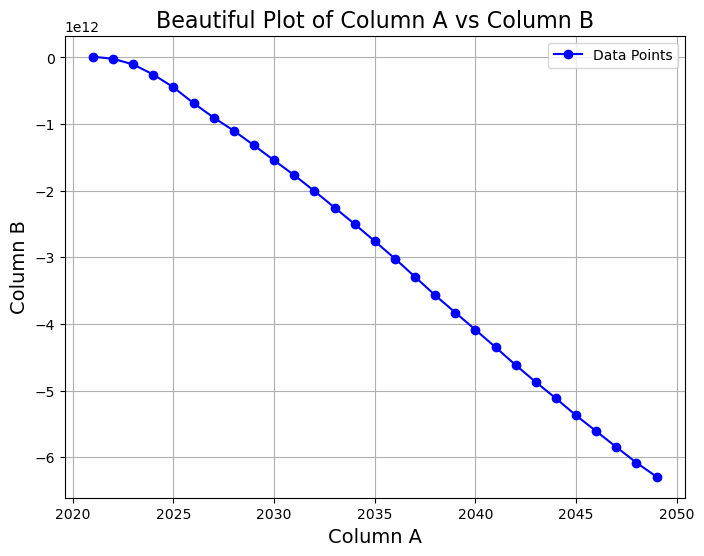

In [1476]:
# Plotting the DataFrame
plt.figure(figsize=(8, 6))  # Set the figure size

# Customize the plot style
plt.plot(result['tahun'], result['anggaran'], marker='o', linestyle='-', color='b', label='Data Points')

# Add title and labels to the axes
plt.title('Beautiful Plot of Column A vs Column B', fontsize=16)
plt.xlabel('Column A', fontsize=14)
plt.ylabel('Column B', fontsize=14)

# Add grid lines and legend
plt.grid(True)
plt.legend()

# Customize ticks if needed
# plt.xticks(range(1, 6))  # To set specific x-axis ticks

# Show the plot
plt.show()